In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as spopt
import numpy as np

file = open('results.txt', 'r')
lines = [list(map(lambda x: float(x), line.split())) for line in file.readlines()]
file.close()

In [2]:
data = {}
for line in lines:
    data[(line[0], line[1])] = line[2:]

a = 0.9156898651215413 +- 0.045411428064980955
b = 1.8823456141370605 +- 0.06236420979379645


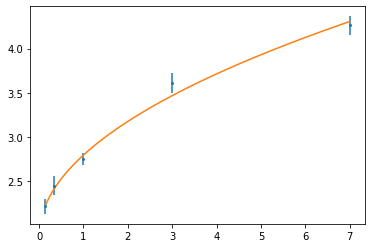

In [7]:
x = []
y = []
yerr = []
for key, value in data.items():
    ratio_abs_sd = key[0] / key[1]
    x.append(ratio_abs_sd)
    y.append(value[2])
    yerr.append(value[3])

# fit
popt, pcov = spopt.curve_fit(lambda z, a, b: a*np.sqrt(z)+b, x, y, sigma = yerr)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(x, y, fmt='o', markersize=2, yerr=yerr)
z = np.linspace(sorted(x)[0], sorted(x)[-1], 500)
plt.plot(z, a*np.sqrt(z)+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")